In [1]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def reduce_mem_usage(props, fillna=False):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                if not fillna:
                    print('[*]skip {} cause of NA value'.format(col))
                    continue
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist



In [3]:
input_dir = os.path.join('..', 'input')
file_csv = [file for file in os.listdir(input_dir) if file.endswith('.csv')]
print(file_csv)

['historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'train.csv', 'test.csv']


# train.csv / test.csv

In [4]:
train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

In [5]:
train_df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [6]:
test_df.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [7]:
train_df.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056


In [8]:
test_df.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1


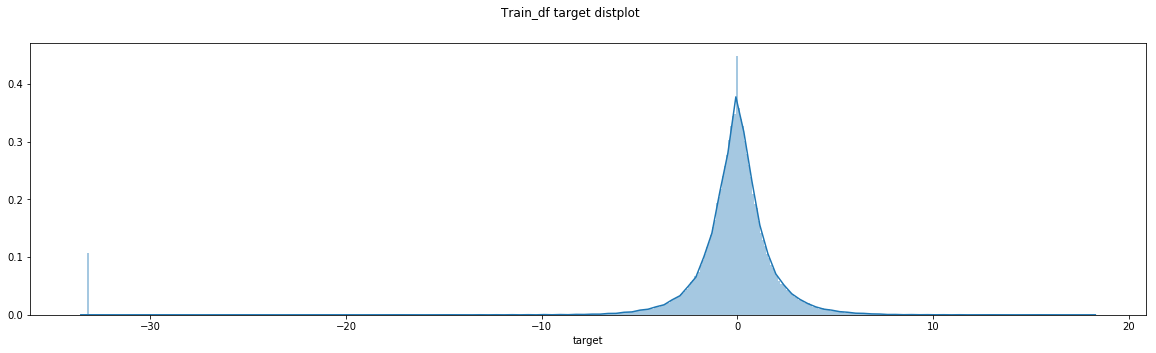

In [9]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Train_df target distplot')
sns.distplot(train_df.target, bins=500)

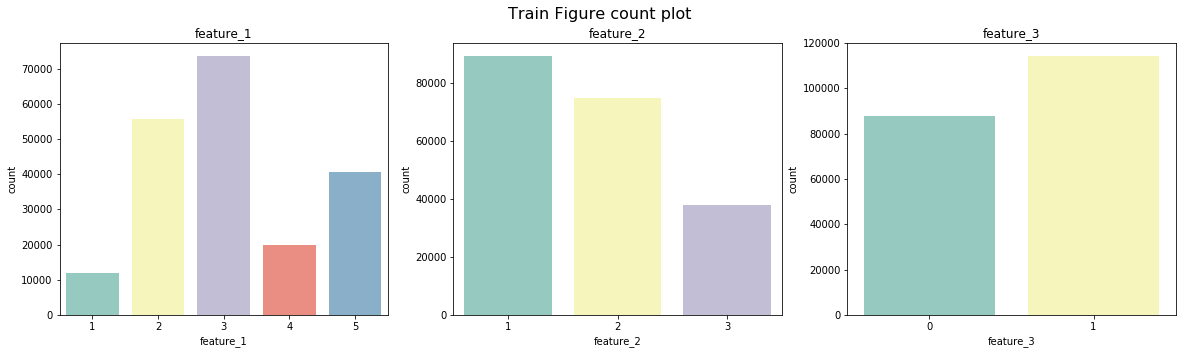

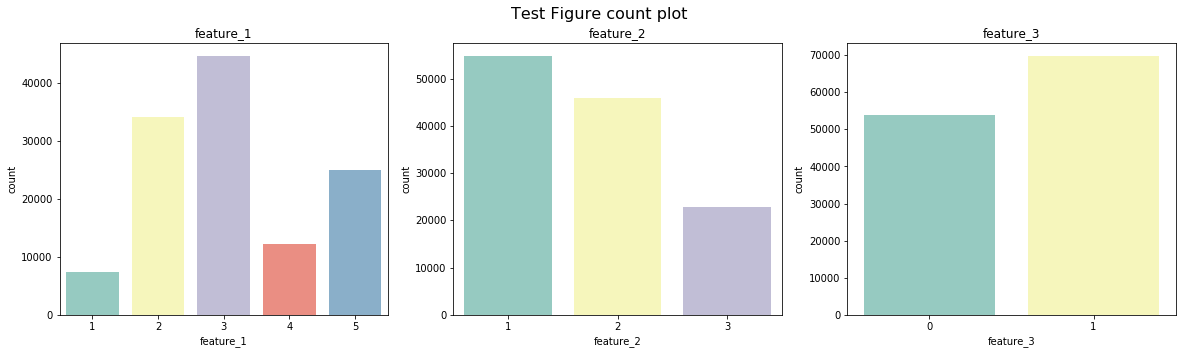

In [97]:
for data, title in zip([train_df, test_df], ['Train', 'Test']):
    fig, axes = plt.subplots(1,3, figsize=(20, 5))
    fig.suptitle('{} Figure count plot'.format(title), fontsize=16)
    for idx, col in enumerate(['feature_1', 'feature_2', 'feature_3']):
        axes[idx].set_title(col)
        sns.countplot(x=col, data=data, palette="Set3", ax=axes[idx])
    #plt.tight_layout()
    plt.show()

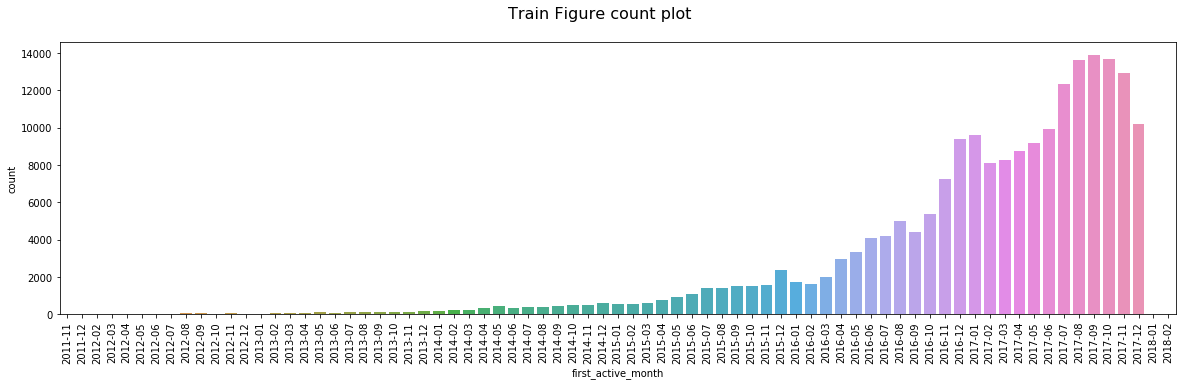

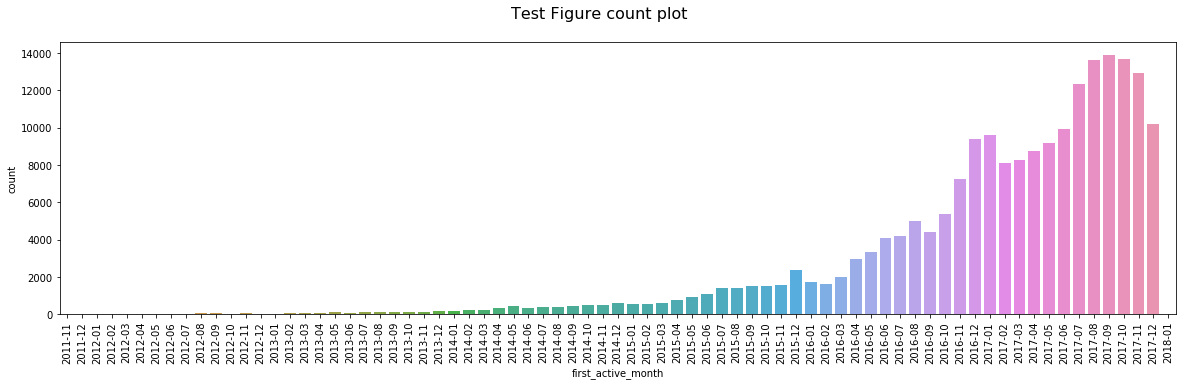

In [95]:
for data, title in zip([train_df, test_df], ['Train', 'Test']):
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    plt.suptitle('{} Figure count plot'.format(title), fontsize=16)
    sns.countplot(x='first_active_month', data=train_df,
                  order = sorted(data['first_active_month'].value_counts().index),
                 )
    plt.show()

In [135]:
del train_df, test_df

# 2. historical_transactions.csv

In [153]:
trans_df = pd.read_csv(os.path.join(input_dir, 'historical_transactions.csv'))
new_trans_df = pd.read_csv(os.path.join(input_dir, 'new_merchant_transactions.csv'))
trans_df, _ = reduce_mem_usage(trans_df, fillna=False)
new_trans_df, _ = reduce_mem_usage(new_trans_df, fillna=False)

Memory usage of properties dataframe is : 3109.5357055664062  MB
******************************
Column:  city_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  installments
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  merchant_category_id
dtype before:  int64
dtype after:  int16
******************************
******************************
Column:  month_lag
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  purchase_amount
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  category_2
dtype before:  float64
[*]skip category_2 cause of NA value
******************************
Column:  state_id
dtype before:  int64
dtype after:  int8
******************************
******************************
Column:  subsector_id
dtype before:  int64

In [154]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              float64
state_id                int8
subsector_id            int8
dtypes: float32(1), float64(1), int16(3), int8(3), object(6)
memory usage: 1.9+ GB


In [155]:
new_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               uint8
purchase_amount         float32
purchase_date           object
category_2              float64
state_id                int8
subsector_id            int8
dtypes: float32(1), float64(1), int16(3), int8(2), object(6), uint8(1)
memory usage: 129.2+ MB


In [113]:
trans_df.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [156]:
new_trans_df.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [105]:
trans_df.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37


In [157]:
new_trans_df.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14


In [169]:
print('[*]card_id in transactions : {}'.format(len(trans_df.card_id.unique())))
print('[*]card_id in new_transactions : {}'.format(len(new_trans_df.card_id.unique())))
print('[*]substarct : {}'.format(len(set(trans_df.card_id.unique()) - set(new_trans_df.card_id.unique()))))

[*]card_id in transactions : 325540
[*]card_id in new_transactions : 290001
[*]substarct : 35539


In [170]:
print('[*]min/max date in transactions')
print('transactions : ', min(trans_df['purchase_date']), max(trans_df['purchase_date']))
print('new_transactions : ', min(new_trans_df['purchase_date']), max(new_trans_df['purchase_date']))

[*]min/max date in transactions
transactions :  2017-01-01 00:00:08 2018-02-28 23:59:51
new_transactions :  2017-03-01 03:24:51 2018-04-30 23:59:59


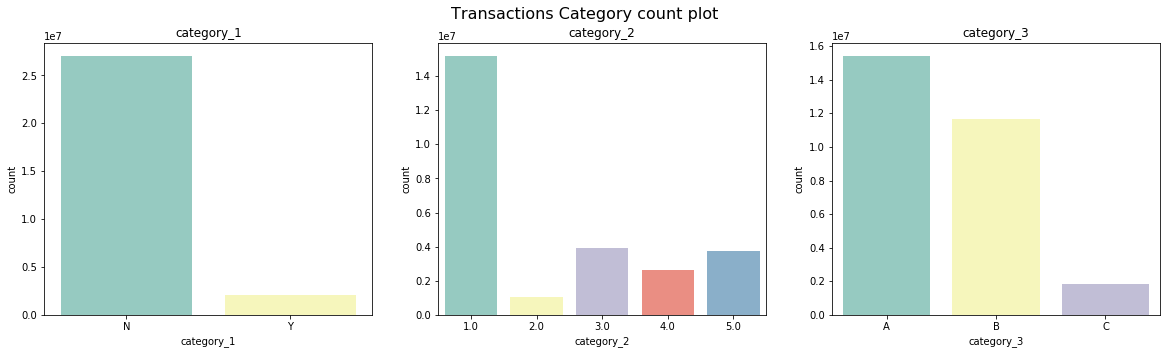

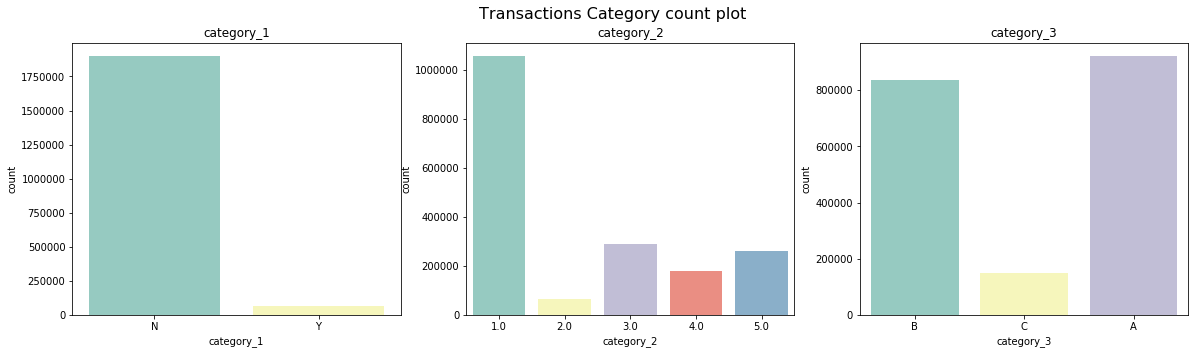

In [158]:
def plot_catetory_col(df):
    fig, axes = plt.subplots(1,3, figsize=(20, 5))
    fig.suptitle('Transactions Category count plot'.format(title), fontsize=16)
    for idx, col in enumerate(['category_1', 'category_2', 'category_3']):
        axes[idx].set_title(col)
        sns.countplot(x=col, data=df, palette="Set3", ax=axes[idx])
plot_catetory_col(trans_df)
plot_catetory_col(new_trans_df)

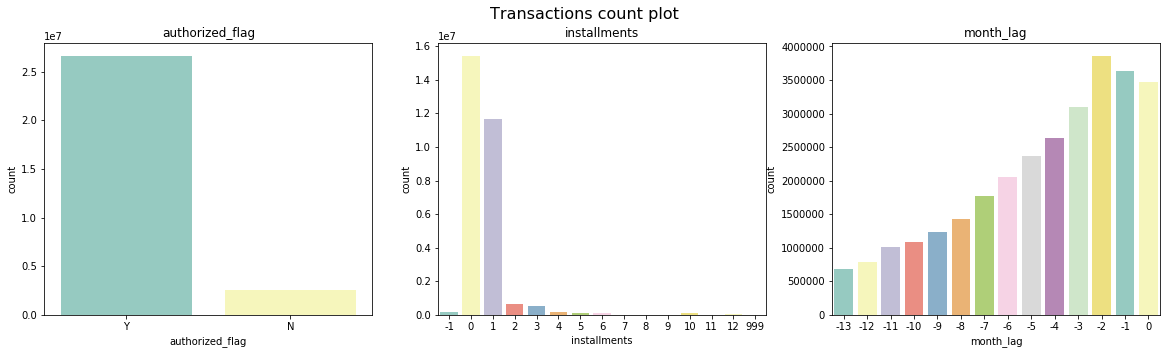

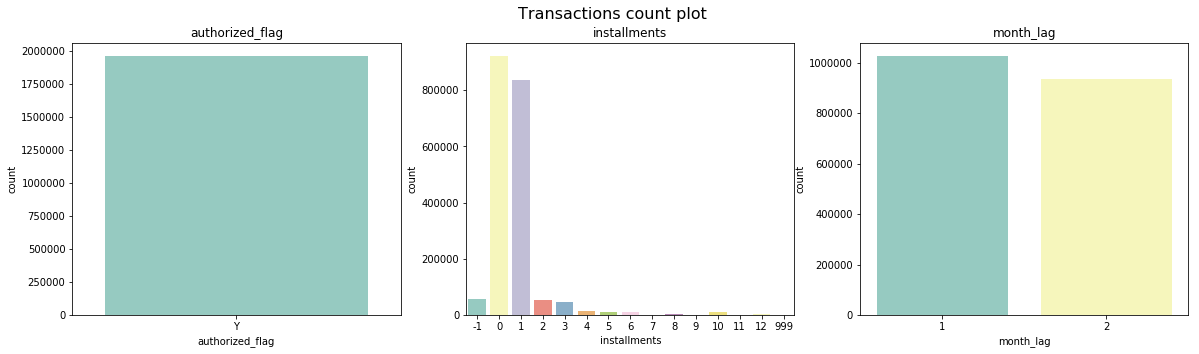

In [171]:
def plot_otehrs_col_1(df):
    fig, axes = plt.subplots(1,3, figsize=(20, 5))
    fig.suptitle('Transactions count plot'.format(title), fontsize=16)
    for idx, col in enumerate(['authorized_flag', 'installments', 'month_lag']):
        axes[idx].set_title(col)
        sns.countplot(x=col, data=df, palette="Set3", ax=axes[idx])
plot_otehrs_col_1(trans_df)
plot_otehrs_col_1(new_trans_df)

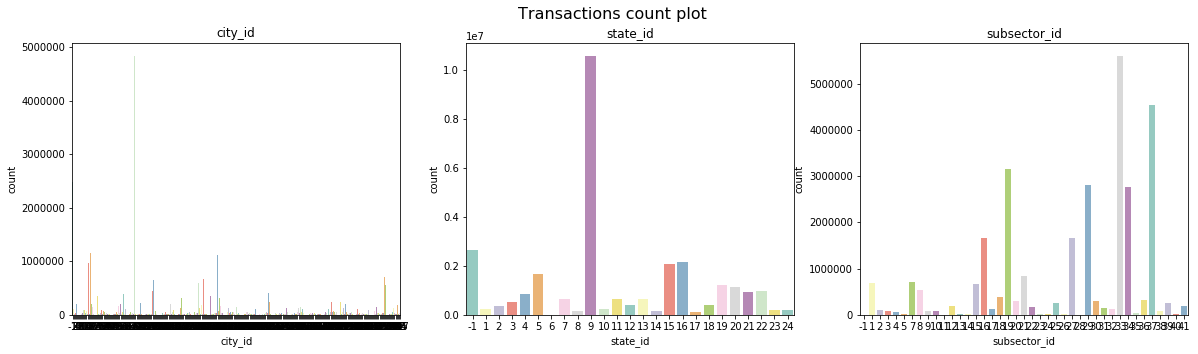

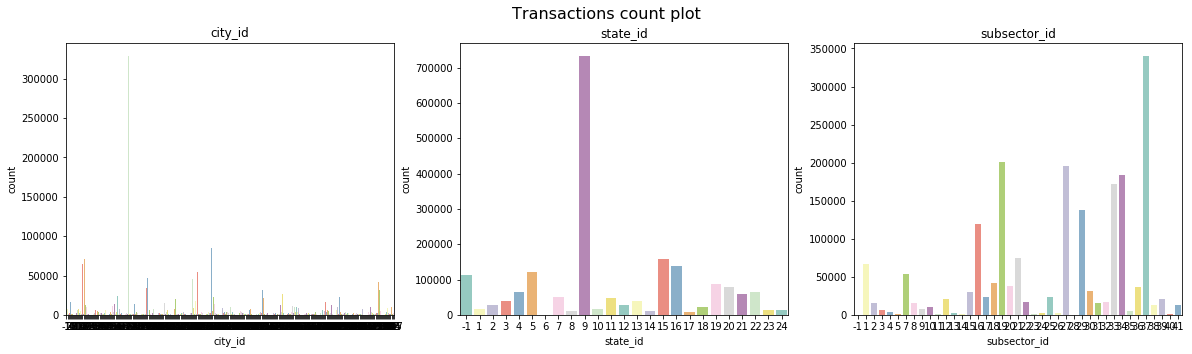

In [172]:
def plot_others_col_2(df):
    fig, axes = plt.subplots(1,3, figsize=(20, 5))
    fig.suptitle('Transactions count plot'.format(title), fontsize=16)
    for idx, col in enumerate(['city_id', 'state_id', 'subsector_id']):
        axes[idx].set_title(col)
        sns.countplot(x=col, data=df, palette="Set3", ax=axes[idx])
plot_others_col_2(trans_df)
plot_others_col_2(new_trans_df)

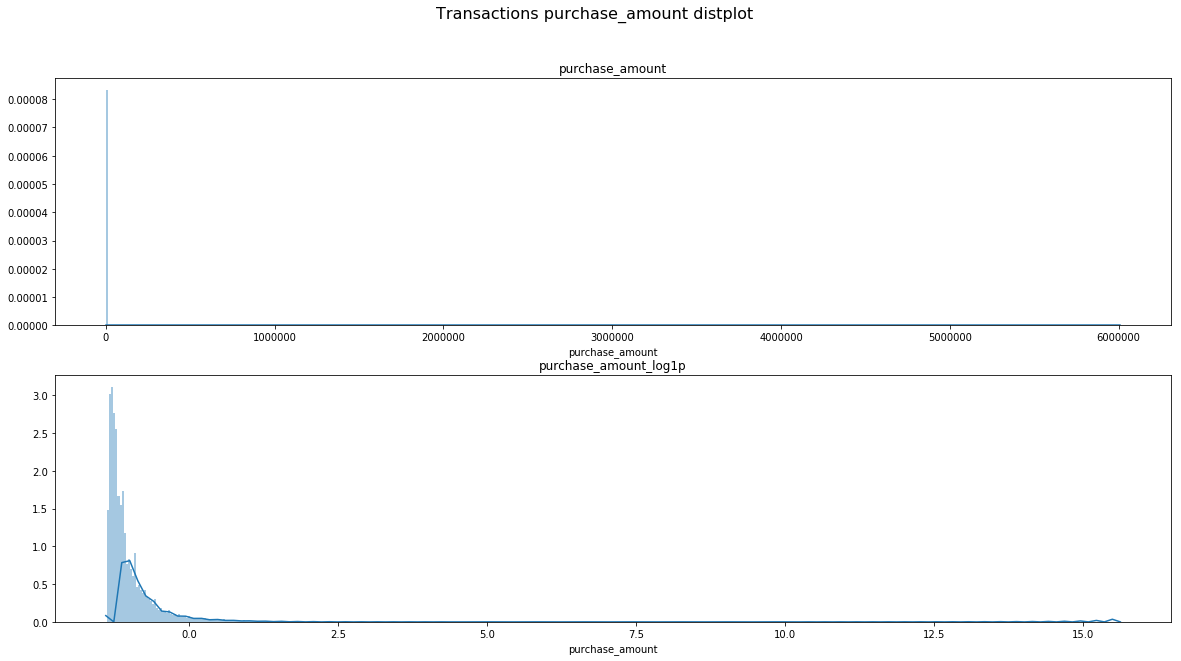

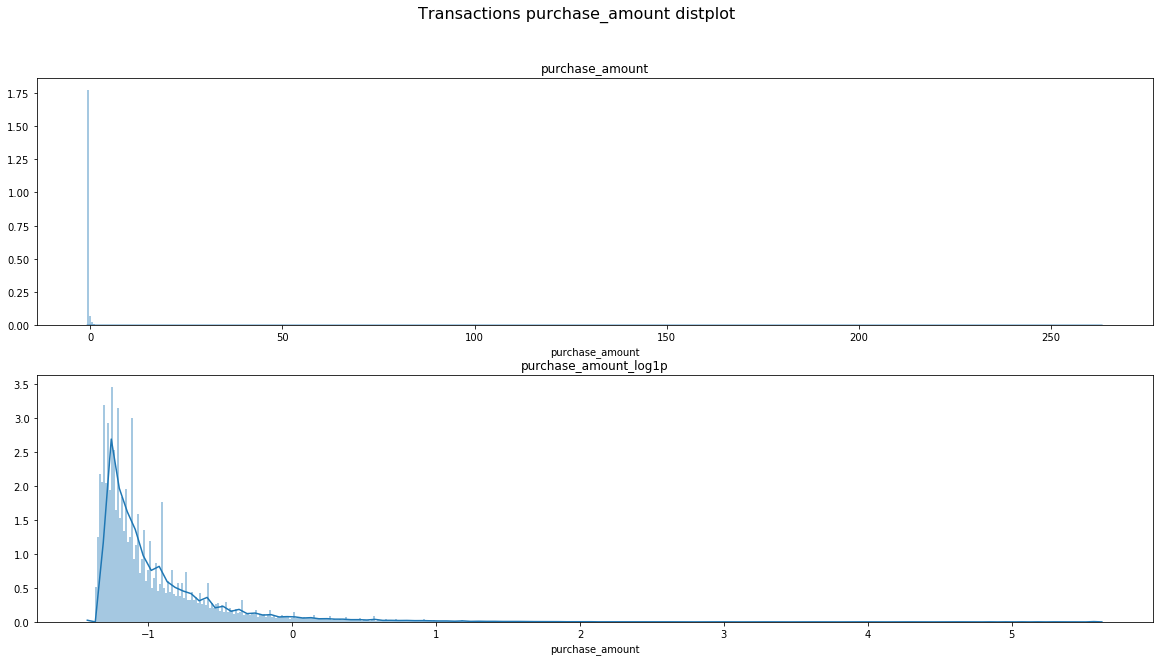

In [173]:
def plot_purchase_amount(df):
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    fig.suptitle('Transactions purchase_amount distplot', fontsize=16)
    axes[0].set_title('purchase_amount')
    sns.distplot(df['purchase_amount'], bins=500, ax=axes[0])
    axes[1].set_title('purchase_amount_log1p')
    sns.distplot(np.log1p(df['purchase_amount']), bins=500, ax=axes[1])
plot_purchase_amount(trans_df)
plot_purchase_amount(new_trans_df)

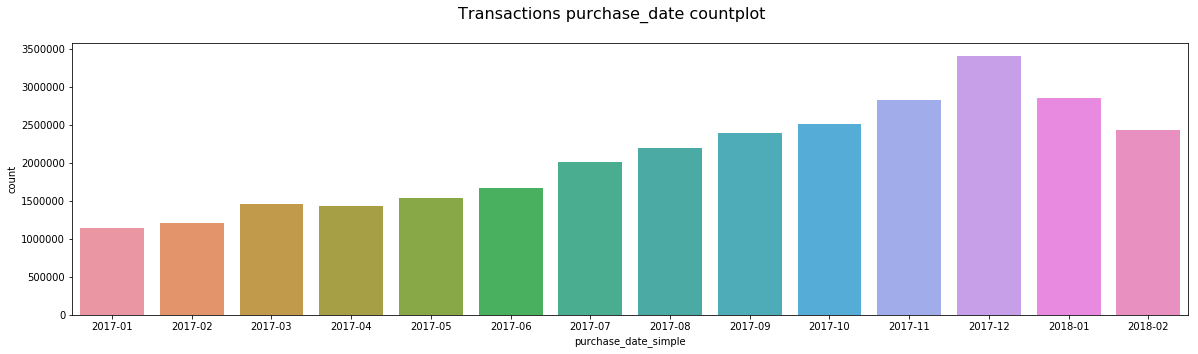

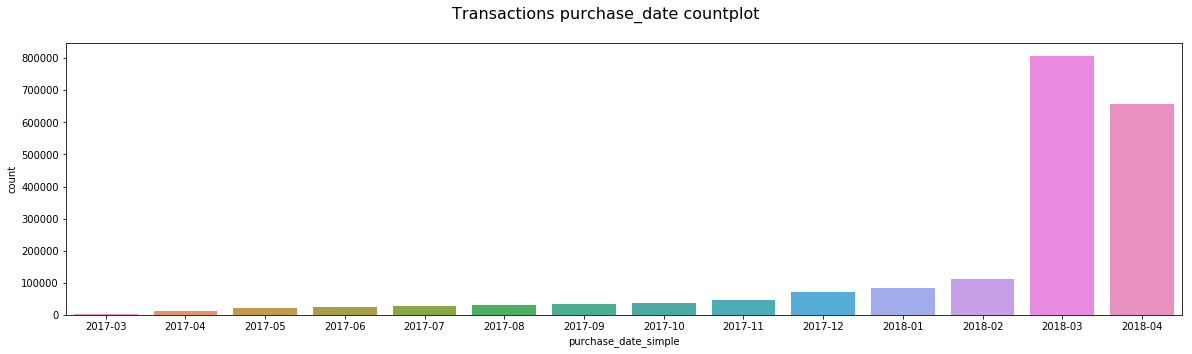

In [174]:
def plot_puchase_date(df):
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle('Transactions purchase_date countplot', fontsize=16)
    df['purchase_date_simple'] = df['purchase_date'].apply(lambda x: x[0:7])
    sns.countplot(x='purchase_date_simple', data=df,
                  order = sorted(df['purchase_date_simple'].unique()))
plot_puchase_date(trans_df)
plot_puchase_date(new_trans_df)

In [175]:
del trans_df, new_trans_df